In [8]:
import gzip
import json
import numpy as np
from scipy.sparse import coo_matrix
import networkx as nx
from networkx.algorithms import approximation
from networkx.algorithms import bipartite

In [9]:
with gzip.open("NCSU-DigIC-GraphData-2023-07-25/counter/1/counter.json.gz", 'rb') as f:
    design = json.loads(f.read().decode('utf-8'))

In [10]:
design

{'instances': [{'name': 'clk_gate_value_reg/latch',
   'id': 0,
   'xloc': 2560,
   'yloc': 7680,
   'cell': 23,
   'orient': 0},
  {'name': 'value_reg_0_',
   'id': 1,
   'xloc': 512,
   'yloc': 4608,
   'cell': 65,
   'orient': 0},
  {'name': 'value_reg_2_',
   'id': 2,
   'xloc': 768,
   'yloc': 7680,
   'cell': 65,
   'orient': 6},
  {'name': 'value_reg_1_',
   'id': 3,
   'xloc': 3584,
   'yloc': 4608,
   'cell': 65,
   'orient': 6},
  {'name': 'U20',
   'id': 4,
   'xloc': 7424,
   'yloc': 4608,
   'cell': 58,
   'orient': 6},
  {'name': 'U21',
   'id': 5,
   'xloc': 6272,
   'yloc': 7680,
   'cell': 48,
   'orient': 6},
  {'name': 'U22', 'id': 6, 'xloc': 6784, 'yloc': 7680, 'cell': 7, 'orient': 6},
  {'name': 'U23',
   'id': 7,
   'xloc': 5760,
   'yloc': 7680,
   'cell': 48,
   'orient': 2},
  {'name': 'U24',
   'id': 8,
   'xloc': 6912,
   'yloc': 4608,
   'cell': 42,
   'orient': 4},
  {'name': 'U25', 'id': 9, 'xloc': 6400, 'yloc': 4608, 'cell': 7, 'orient': 4},
  {'name': 'U

In [11]:
with gzip.open("NCSU-DigIC-GraphData-2023-07-25/cells.json.gz", 'rb') as f:
    cells = json.loads(f.read().decode('utf-8'))

In [12]:
cells[7]

{'name': 'AOI21_X1',
 'width': 768,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B', 'id': 3, 'dir': 0},
  {'name': 'ZN', 'id': 4, 'dir': 1}],
 'id': 7}

In [14]:
conn = np.load("NCSU-DigIC-GraphData-2023-07-25/counter/1/counter_connectivity.npz")

In [15]:
coo = coo_matrix((conn['data'], (conn['row'], conn['col'])), shape=conn['shape'])

In [16]:
counter_coo = coo.toarray()

In [17]:
print(counter_coo.shape)
print(counter_coo)

(23, 28)
[[1 0 0 0 0 0 3 0 0 0 0 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 2 0 0 0 0 6 0 5 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 3 0 6 0 0 0 5 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 6 0 0 5 0 0 0 0 1 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 1 0 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 4 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

In [18]:
am = (np.dot(counter_coo, counter_coo.T) > 0).astype(int)
np.fill_diagonal(am, 0)

In [19]:
print(am)

[[0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 1 

In [20]:
g = nx.from_numpy_array(am)

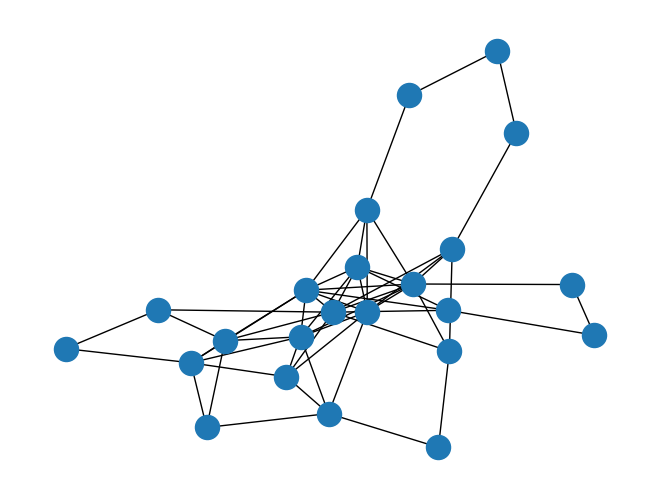

In [21]:
nx.draw(g)

In [22]:
counter_instance_names = {idx: i['name'] for idx, i in enumerate(design['instances'])}
counter_instance_names

{0: 'clk_gate_value_reg/latch',
 1: 'value_reg_0_',
 2: 'value_reg_2_',
 3: 'value_reg_1_',
 4: 'U20',
 5: 'U21',
 6: 'U22',
 7: 'U23',
 8: 'U24',
 9: 'U25',
 10: 'U26',
 11: 'U28',
 12: 'U27',
 13: 'U29',
 14: 'ropt_h_inst_941',
 15: 'copt_h_inst_790',
 16: 'copt_h_inst_791',
 17: 'copt_h_inst_793',
 18: 'copt_h_inst_794',
 19: 'copt_h_inst_795',
 20: 'copt_h_inst_796',
 21: 'ropt_h_inst_942',
 22: 'ropt_h_inst_943'}

In [23]:
g = nx.relabel_nodes(g, counter_instance_names)

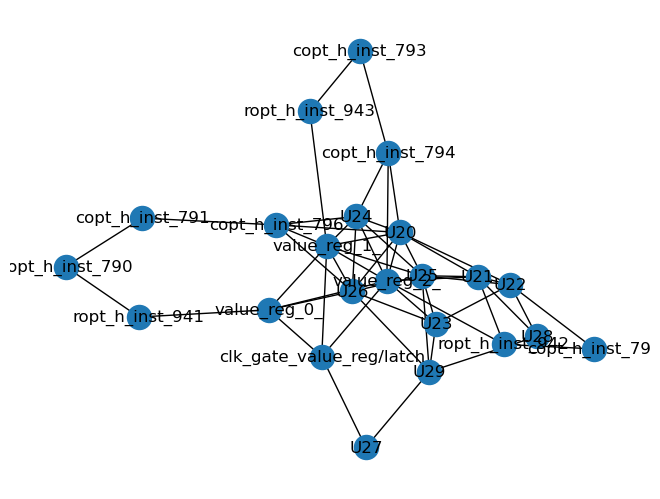

In [24]:
nx.draw(g, with_labels=True)

In [25]:
approximation.all_pairs_node_connectivity(g)

{'clk_gate_value_reg/latch': {'value_reg_0_': 4,
  'value_reg_2_': 4,
  'value_reg_1_': 4,
  'U20': 4,
  'U21': 4,
  'U22': 4,
  'U23': 4,
  'U24': 4,
  'U25': 4,
  'U26': 4,
  'U28': 3,
  'U27': 2,
  'U29': 4,
  'ropt_h_inst_941': 2,
  'copt_h_inst_790': 2,
  'copt_h_inst_791': 2,
  'copt_h_inst_793': 2,
  'copt_h_inst_794': 3,
  'copt_h_inst_795': 2,
  'copt_h_inst_796': 4,
  'ropt_h_inst_942': 3,
  'ropt_h_inst_943': 2},
 'value_reg_0_': {'clk_gate_value_reg/latch': 4,
  'value_reg_2_': 5,
  'value_reg_1_': 5,
  'U20': 5,
  'U21': 4,
  'U22': 4,
  'U23': 5,
  'U24': 5,
  'U25': 5,
  'U26': 5,
  'U28': 3,
  'U27': 2,
  'U29': 5,
  'ropt_h_inst_941': 2,
  'copt_h_inst_790': 2,
  'copt_h_inst_791': 2,
  'copt_h_inst_793': 2,
  'copt_h_inst_794': 3,
  'copt_h_inst_795': 2,
  'copt_h_inst_796': 5,
  'ropt_h_inst_942': 3,
  'ropt_h_inst_943': 2},
 'value_reg_2_': {'clk_gate_value_reg/latch': 4,
  'value_reg_0_': 5,
  'value_reg_1_': 8,
  'U20': 8,
  'U21': 6,
  'U22': 6,
  'U23': 5,
  'U2

In [26]:
am_edges = (np.dot(counter_coo.T, counter_coo) > 0).astype(int)
np.fill_diagonal(am_edges, 0)
print(am_edges)

[[0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0]
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 

In [27]:
am.shape

(23, 23)

In [61]:
def is_sym(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    if rows != cols:
        return False
    
    for i in range(rows):
        for j in range(cols):
            if i != j and matrix[i][j] != matrix[j][i]:
                print(i, j)
                return False
    
    return True

In [62]:
is_sym(am)

True

In [28]:
am_edges.shape

(28, 28)

In [29]:
am_bipartite = np.vstack((np.hstack((np.zeros((23,23), dtype=int), counter_coo)),np.hstack((counter_coo.T, np.zeros((28, 28),dtype=int)))))
am_bipartite = (am_bipartite > 0).astype(int)

In [30]:
g_bipart = nx.from_numpy_array(am_bipartite)

In [31]:
bipartite.is_bipartite(g_bipart)

True

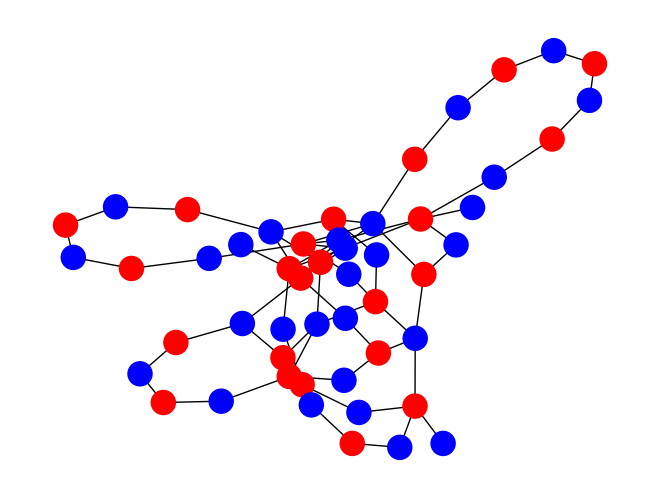

In [32]:
colormap = ['red']*23 + ['blue']*28
nx.draw(g_bipart, node_color=colormap)

In [133]:
cells[1:4]

[{'name': 'AND2_X2',
  'width': 896,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 1},
 {'name': 'AND3_X1',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 2},
 {'name': 'AND3_X2',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 3}]

In [136]:
counter_coo[0]

array([1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

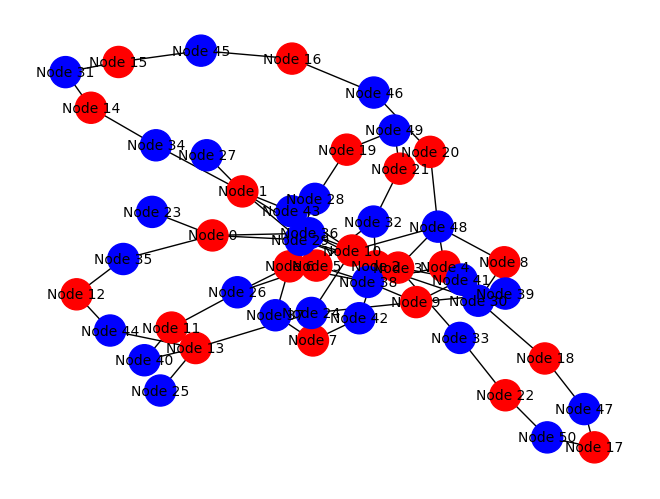

In [99]:
g_bipart.edges(23)
node_labels = {i: f"Node {i}" for i in range(am_bipartite.shape[0])}
pos = nx.spring_layout(g_bipart)
nx.draw(g_bipart, pos, with_labels=True, labels=node_labels, node_color=colormap, node_size=500, font_size=10)

In [63]:
am_bipartite_2 = np.vstack((np.hstack((np.zeros((23,23), dtype=int), counter_coo)),np.hstack((counter_coo.T, np.zeros((28, 28),dtype=int)))))


In [77]:
len((np.hstack((np.zeros((23,23), dtype=int), counter_coo)))[0])

51

In [64]:
print(am_bipartite_2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [82]:
counter_coo

array([[1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 6, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 3, 0, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 4, 0, 0, 0,
        0, 0, 0, 

In [137]:
counter_coo[:, 1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [141]:
design['instances'][7]

{'name': 'U23', 'id': 7, 'xloc': 5760, 'yloc': 7680, 'cell': 48, 'orient': 2}

In [70]:
is_sym(am_bipartite_2)

True

In [65]:
G = nx.from_numpy_array(am_bipartite_2, create_using=nx.DiGraph)

In [89]:
counter_coo[:, 1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [90]:
cells[7]

{'name': 'AOI21_X1',
 'width': 768,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B', 'id': 3, 'dir': 0},
  {'name': 'ZN', 'id': 4, 'dir': 1}],
 'id': 7}

In [91]:
cells[10]

{'name': 'AOI22_X2',
 'width': 1536,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B1', 'id': 3, 'dir': 0},
  {'name': 'B2', 'id': 4, 'dir': 0},
  {'name': 'ZN', 'id': 5, 'dir': 1}],
 'id': 10}

In [92]:
cells[8]

{'name': 'AOI21_X2',
 'width': 1152,
 'height': 1536,
 'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
  {'name': 'A2', 'id': 2, 'dir': 0},
  {'name': 'B', 'id': 3, 'dir': 0},
  {'name': 'ZN', 'id': 4, 'dir': 1}],
 'id': 8}

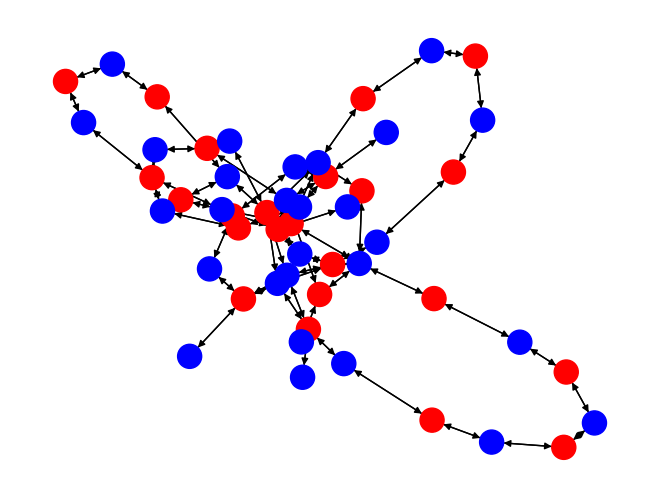

In [66]:
colormap = ['red']*23 + ['blue']*28
nx.draw(G, node_color=colormap)

In [34]:
data=np.load('NCSU-DigIC-GraphData-2023-07-25/counter/1/counter_congestion.npz')
lyr=list(data['layerList']).index('M1')
ybl=data['yBoundaryList']
xbl=data['xBoundaryList']

In [35]:
data['demand'][2]

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 2, 3, 3],
       [3, 1, 5, 6, 4],
       [2, 2, 5, 6, 5],
       [0, 1, 3, 3, 2],
       [0, 0, 0, 0, 0]])

In [36]:
data['capacity'][2]

array([[15, 11, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16],
       [11,  8, 12, 12, 16]])

In [38]:
data = np.load("NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar_congestion.npz")
lyr=list(data['layerList']).index('M1')
ybl=data['yBoundaryList']
xbl=data['xBoundaryList']

In [39]:
data['demand']

array([[[ 0,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 2,  0,  0, ...,  0,  0,  1],
        ...,
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 0,  0,  0, ...,  0,  0,  1]],

       [[ 2,  2,  5, ...,  3,  2,  2],
        [ 3,  2,  4, ...,  2,  1,  0],
        [ 2,  3,  6, ...,  2,  2,  0],
        ...,
        [ 3,  3,  9, ...,  4,  3,  1],
        [ 2,  5,  7, ...,  3,  3,  1],
        [ 0,  1,  2, ...,  1,  1,  1]],

       [[ 2,  0,  3, ...,  1,  0,  1],
        [ 3,  0,  7, ...,  2,  2,  1],
        [ 5,  2,  8, ...,  3, 14, 16],
        ...,
        [ 4,  3,  6, ...,  3,  1,  2],
        [ 1,  3,  5, ...,  1,  2,  1],
        [ 0,  1,  1, ...,  0,  1,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [41]:
with gzip.open("NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar.json.gz", 'rb') as f:
    xbar1 = json.loads(f.read().decode('utf-8'))

In [42]:
xbar1

{'instances': [{'name': 'clk_gate_out_reg/latch',
   'id': 0,
   'xloc': 41984,
   'yloc': 44544,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_0/latch',
   'id': 1,
   'xloc': 41984,
   'yloc': 47616,
   'cell': 23,
   'orient': 6},
  {'name': 'clk_gate_out_reg_1/latch',
   'id': 2,
   'xloc': 44160,
   'yloc': 44544,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_2/latch',
   'id': 3,
   'xloc': 44160,
   'yloc': 47616,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_3/latch',
   'id': 4,
   'xloc': 46336,
   'yloc': 47616,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_4/latch',
   'id': 5,
   'xloc': 44160,
   'yloc': 50688,
   'cell': 23,
   'orient': 6},
  {'name': 'clk_gate_out_reg_5/latch',
   'id': 6,
   'xloc': 41984,
   'yloc': 47616,
   'cell': 23,
   'orient': 0},
  {'name': 'clk_gate_out_reg_6/latch',
   'id': 7,
   'xloc': 44416,
   'yloc': 47616,
   'cell': 23,
   'orient': 6},
  {'name': 'clk_gate_out_reg_7/latch'

In [44]:
xbar1conn = np.load("NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar_connectivity.npz")

In [45]:
xbar1coo = coo_matrix((xbar1conn['data'], (xbar1conn['row'], xbar1conn['col'])), shape=xbar1conn['shape'])

In [46]:
xbar_coo_arr = xbar1coo.toarray()

In [47]:
xbar_coo_arr.shape

(3952, 4482)

In [48]:
xbar_am = (np.dot(xbar_coo_arr, xbar_coo_arr.T) > 0).astype(int)
np.fill_diagonal(xbar_am, 0)

In [102]:
xbar_am

array([[0, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0]])

In [49]:
xbar_g = nx.from_numpy_array(xbar_am)

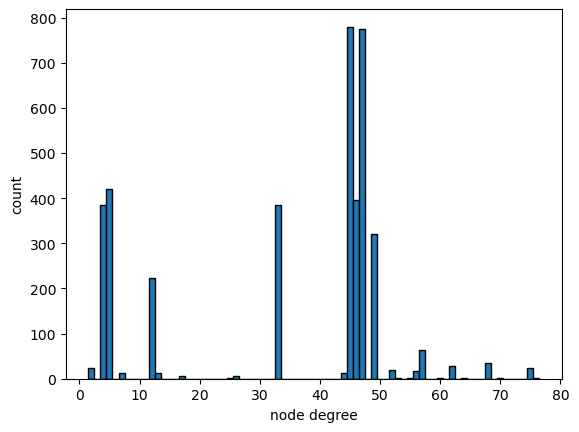

In [105]:
import matplotlib.pyplot as plt

def plot_degree_distribution(graph):
    degree_sequence = [d for n, d in graph.degree()]
    
    plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2), align='left', edgecolor='black')
    plt.xlabel("node degree")
    plt.ylabel("count")
    plt.show()

plot_degree_distribution(xbar_g)

(array([13., 11.,  7.,  3.,  6.,  4.,  3.,  1.,  1.,  2.]),
 array([0.        , 0.02358603, 0.04717206, 0.07075808, 0.09434411,
        0.11793014, 0.14151617, 0.16510219, 0.18868822, 0.21227425,
        0.23586028]),
 <BarContainer object of 10 artists>)

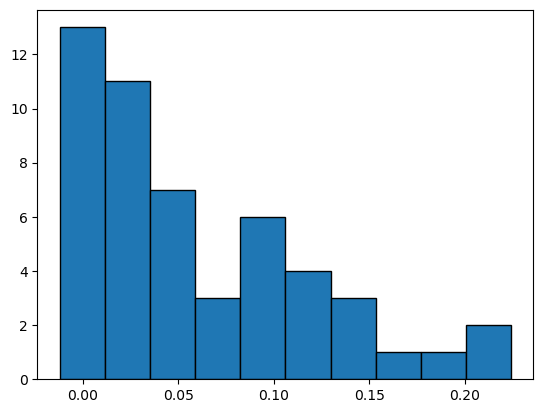

In [126]:
counter_centrality = (list(nx.betweenness_centrality(g_bipart).values()))
plt.hist(counter_centrality, bins=10, align='left', edgecolor='black')


In [127]:
max(counter_centrality)

0.23586027657816386

In [128]:
min(counter_centrality)

0.0

In [129]:
np.percentile(counter_centrality, 75)

0.1094795281749063

In [130]:
np.median(counter_centrality)

0.04817052362070371

In [131]:
np.mean(counter_centrality)

0.07201280512204883

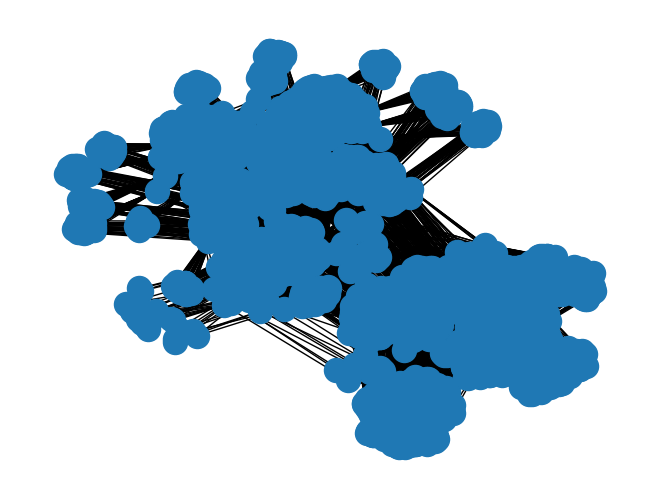

In [38]:
nx.draw(xbar_g)